<a href="https://colab.research.google.com/github/wahyunugroho424/proyek-analisis-data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wahyu Nugroho
- **Email:** wahyumnapaham2gmail.com
- **ID Dicoding:** wahyu_nugroho_123

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Garhering Data**

In [94]:
#1. Gathering Data
print("Gathering Data")
print("")
print("data costumer")
print("-"*15)
customers_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/customers_dataset.csv")
print(customers_df.head())

Gathering Data

data costumer
---------------
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


### **Assessing Data**

#### Informasi terkait missing value

In [95]:
print("informasi terkait jumlah missing values")
print("-"*15)
print(customers_df.isna().sum())

informasi terkait jumlah missing values
---------------
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


##### memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df

In [96]:
print(" memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df.")
print(""*15)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

 memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada orders_df.

Jumlah duplikasi:  0


###### Ringkasan pada data customer

In [97]:
print(customers_df.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


### **Cleaning Data**

#### Menghilangkan duplicate data

In [98]:
customers_df.drop_duplicates(inplace=True)

##### Mengecek duplicate data

In [99]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


###### Cara mengecek tipe data

In [100]:
print(customers_df.customer_city.value_counts())

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64


###### Memfilter DataFrame customers_df agar hanya menampilkan baris dengan nilai tertinggi pada kolom customer_zip_code

In [101]:
print(customers_df[customers_df.customer_zip_code_prefix == customers_df.customer_zip_code_prefix.max()])

                            customer_id                customer_unique_id  \
25752  f04c3f6e20a2a4318d97d7cec1d27bbf  8f846b30f8f56368cd1bf4c89efeed74   

       customer_zip_code_prefix customer_city customer_state  
25752                     99990     muliterno             RS  


###### Mengganti nilai terbesar dalam kolom age dengan angka 10000

In [102]:
customers_df["customer_zip_code_prefix"] = customers_df["customer_zip_code_prefix"].replace(
    customers_df["customer_zip_code_prefix"].max(), 100000
)

print(customers_df[customers_df["customer_zip_code_prefix"] == 100000])


                            customer_id                customer_unique_id  \
25752  f04c3f6e20a2a4318d97d7cec1d27bbf  8f846b30f8f56368cd1bf4c89efeed74   

       customer_zip_code_prefix customer_city customer_state  
25752                    100000     muliterno             RS  


## **Exploratory Data Analysis (EDA)**

### Menghitung jumlah detik

In [103]:
print("menghitung jumlah detik")
print("-"*20)
orders_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/orders_dataset.csv")
print(orders_df.head())


orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_customer_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
print(orders_df[["order_id", "customer_id", "order_delivered_customer_date", "order_delivered_customer_date", "delivery_time"]].head().to_string(index=False))
print(" ")

menghitung jumlah detik
--------------------
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1  

#### Ringkasan pada data order

In [104]:
print("Ringkasan pada data order")
print("-"*15)
print(orders_df.describe(include="all"))

Ringkasan pada data order
---------------
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

       order_status o

##### menambahkan kolom nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali

In [105]:
print("Menambahkan kolom nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali")
print("-"*120)
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
print(customers_df.sample(5))

Menambahkan kolom nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali
------------------------------------------------------------------------------------------------------------------------
                            customer_id                customer_unique_id  \
24445  fc2f56601bbd8434a91b963b8ac49f35  a1f6aec75e41168caba548372f245c68   
59739  c55e91baa5b84fbb9542c7409726987a  77580682d291bed61f99498d2926f9be   
36209  16ec27fb0960851e8be0060ea6ed2a32  c308ad85f7c793a8572bd487835497b9   
48263  77219b957c07413209c707ba9795b3f1  3bc432ef4e30a7b54968dc0de9e230ce   
65392  12fd551b8fcfa9432c62a084ffb4a34b  f7a61703fc84ca6a1ff7438a7ae26758   

       customer_zip_code_prefix customer_city customer_state  status  
24445                     23970        paraty             RJ  Active  
59739                     78575         juara             MT  Active  
36209    

###### Informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active

In [106]:
print(" informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”")
print(customers_df.groupby(by="status").customer_id.count())


 informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”
status
Active    99441
Name: customer_id, dtype: int64


###### menggabungkan keduanya melalui proses join atau merge. (DATA COSTUMER DAN DATA ORDER)

In [107]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
print(orders_customers_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

###### informasi terkait jumlah order berdasarkan kota

In [108]:
print(" informasi terkait jumlah order berdasarkan customer_state")
print("-"*15)
print(orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10))

 informasi terkait jumlah order berdasarkan customer_state
---------------
  customer_state  order_id
0             SP     41746
1             RJ     12852
2             MG     11635
3             RS      5466
4             PR      5045
5             SC      3637
6             BA      3380
7             DF      2140
8             ES      2033
9             GO      2020


###### Jumlah order berdasarkan state

In [109]:
print("Jumlah order berdasarkan state")
print("-"*15)
print(orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False))

Jumlah order berdasarkan state
---------------
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64


## **Visualization & Explanatory Analysis**

### Bar Chart - Jumlah Order Berdasarkan State

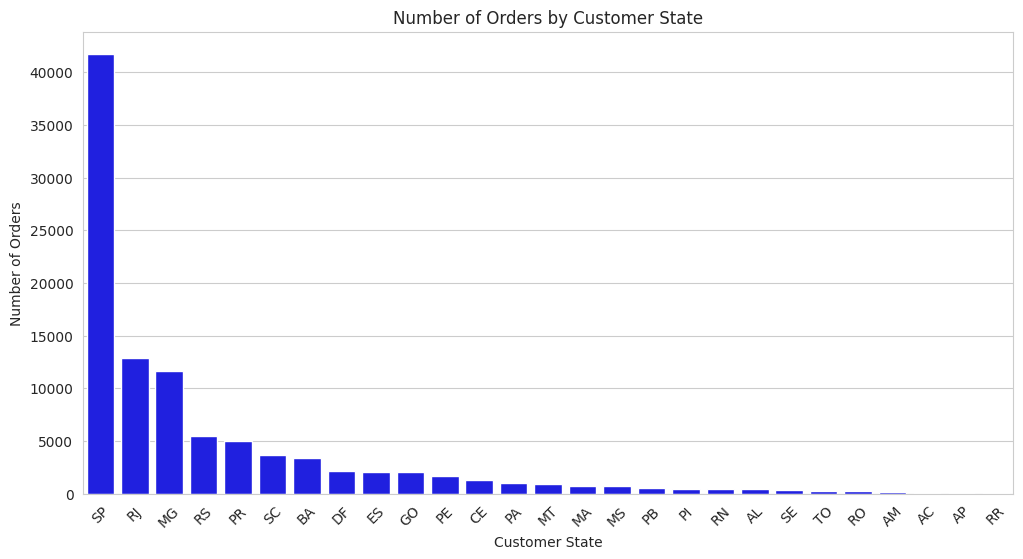

In [111]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
customers_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/customers_dataset.csv")
orders_df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/orders_dataset.csv")
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

order_counts = orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=order_counts.index, y=order_counts.values, color='blue')
plt.xlabel("Customer State")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Customer State")
plt.xticks(rotation=45)
plt.show()

####  Pie Chart - Status Customer (Active vs Non Active)

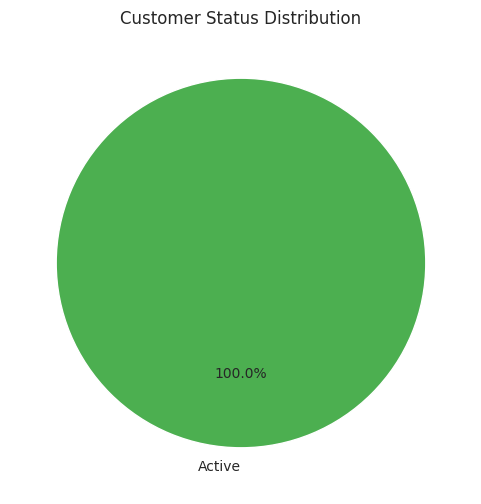

In [112]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
status_counts = customers_df["status"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#4CAF50', '#FF5733'], startangle=90)
plt.title("Customer Status Distribution")
plt.show()

##### Histogram - Distribusi Waktu Pengiriman

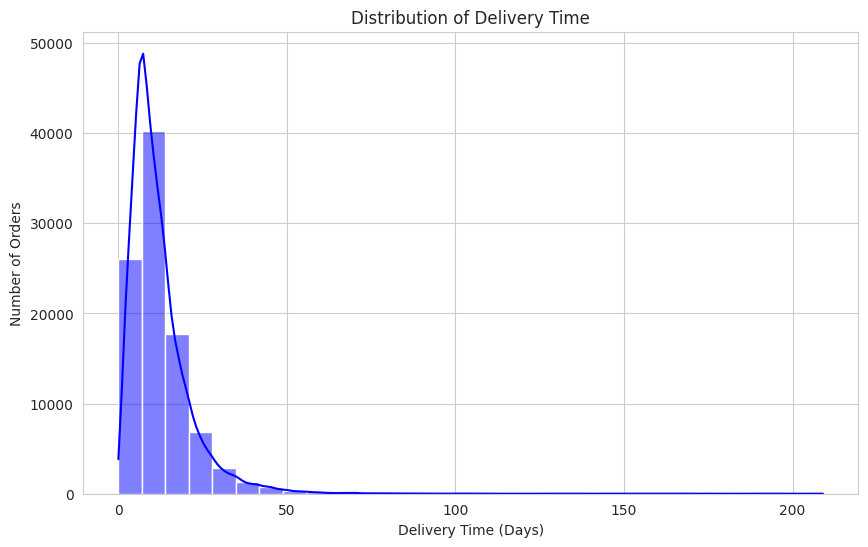

In [113]:
# Histogram - Distribusi waktu pengiriman pesanan
df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/orders_dataset.csv")
# Mengonversi kolom tanggal menjadi tipe data datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
#visual histogram
df["delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df_clean = df.dropna(subset=["delivery_time"])
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["delivery_time"], bins=30, kde=True, color="blue")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Time")
plt.show()

###### Box Plot Variasi waktu pengiriman pesanan

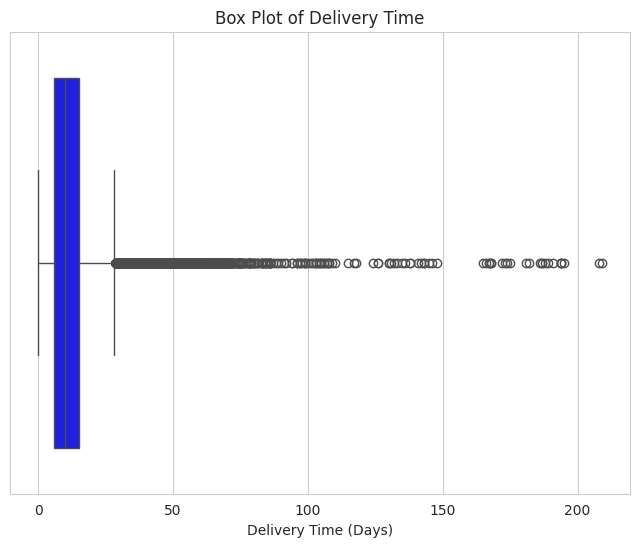

In [114]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean["delivery_time"], color="blue")
plt.xlabel("Delivery Time (Days)")
plt.title("Box Plot of Delivery Time")
plt.show()

######  Line Chart - Tren jumlah pesanan berdasarkan waktu

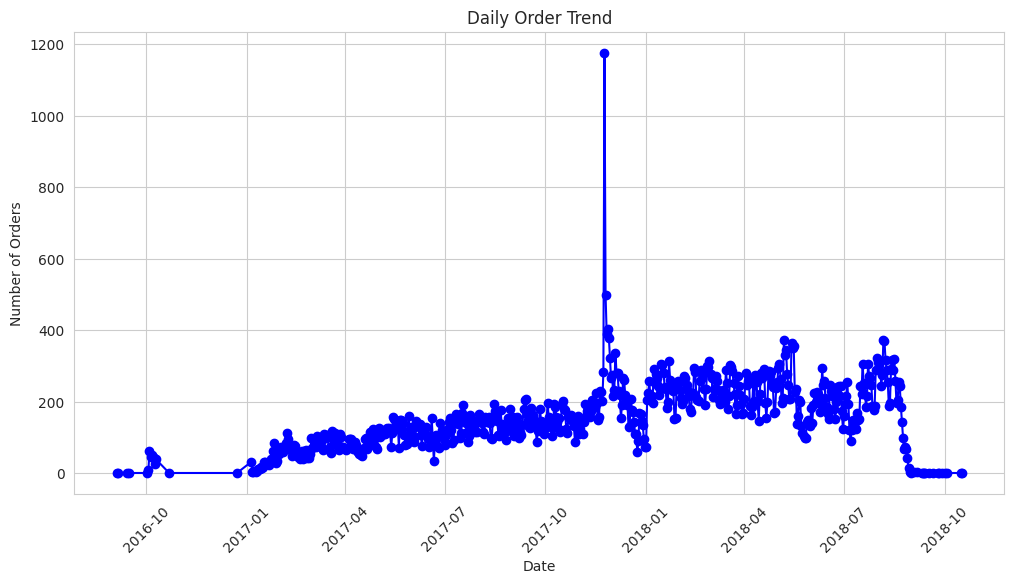

In [115]:
# Histogram - Distribusi waktu pengiriman pesanan
df = pd.read_csv("https://raw.githubusercontent.com/wahyunugroho424/proyek-analisis-data/main/data/orders_dataset.csv")
# Mengonversi kolom tanggal menjadi tipe data datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
#visual
order_trend = df.groupby(df["order_purchase_timestamp"].dt.date).size()
plt.figure(figsize=(12, 6))
plt.plot(order_trend.index, order_trend.values, color='blue', marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.title("Daily Order Trend")
plt.xticks(rotation=45)
plt.show()

###### Scatter Plot - Hubungan antara waktu pengiriman dan jumlah pesanan

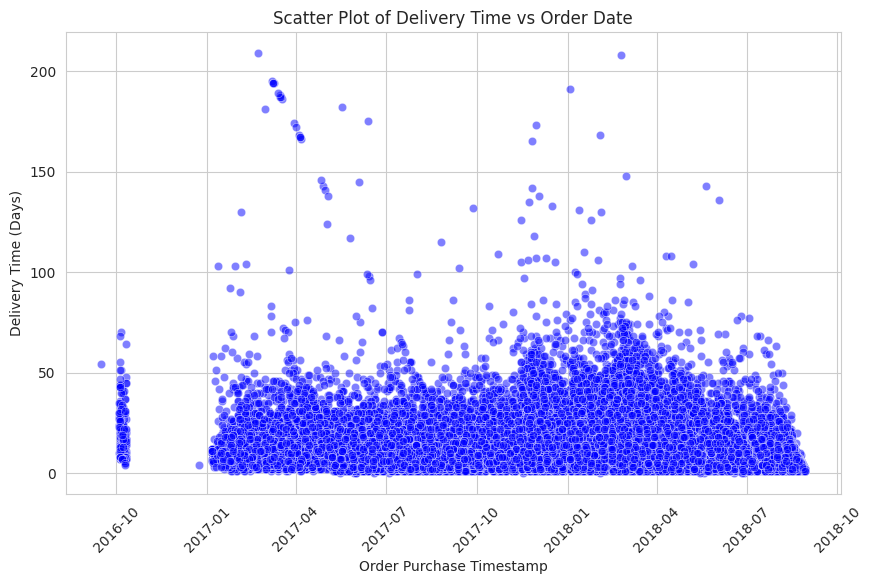

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean["order_purchase_timestamp"], y=df_clean["delivery_time"], alpha=0.5, color='blue')
plt.xlabel("Order Purchase Timestamp")
plt.ylabel("Delivery Time (Days)")
plt.title("Scatter Plot of Delivery Time vs Order Date")
plt.xticks(rotation=45)
plt.show()
